# Teoria do Aprendizado Estatístico
### Atividade 03


De acordo com o enunciado das questões:

> Utilize os dados Wall-Following Robot Navigation (https://github.com/andersonara/datasets). Exiba as fronteiras de decisão para todos os métodos aplicados (e suas variações). Aplique ao menos um método de validação e calcule as medidas de desempenho. Justifique suas escolhas. Exiba, interprete os resultados e indique o método de classificação escolhido. Insira os códigos como anexo. Crie um relatório de até 5 páginas, sem contar as referências e o anexo.

Espera-se, para o mestrado, uma comparação entre:

> KNN e Regressão Logística.

## Bibliotecas necessárias

Antes de realizar a importação, é necessáiria a importação das seguintes bibliotecas:

In [1]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

Após isso, a efetiva importação das seguintes bibliotecas

In [2]:
# Calcular performance
from functools import wraps
import time

# Para tratamento de dados
import pandas as pd
import numpy as np

# Para graficos
import matplotlib.pyplot as plt

#----------------------------------------------------------
# Aprendizado estatístico
#

# Amostragem
from sklearn.model_selection import train_test_split

# Validacao
from sklearn.model_selection import cross_val_score, KFold

# Modelagem
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Avaliacao
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

## Coleta de dados

Será utilizada a base de dados informada no slide. 
Seus dados são lidos diretamente do rawcontent do GitHub, funcionalidade disponível ao acessar o link do arquivo no repositório e optar por "rawcontent".

In [3]:


url = ('https://raw.githubusercontent.com/'
       'andersonara/datasets/master/'
       'wall-robot-navigation.csv')


df = pd.read_csv(url, delimiter=';')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      5456 non-null   float64
 1   X2      5456 non-null   float64
 2   Y       5456 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 128.0 KB


A tabela importada, portanto, possui  `5.456` observações, separadas em duas colunas do tipo float64 de atributos epxlicativos e uma variável explicata em formato int64, em que cada número representa uma classe.

In [4]:
df.head()

,X1,X2,Y
0,1.687,0.445,4
1,1.687,0.449,4
2,1.687,0.449,4
3,1.687,0.449,4
4,1.687,0.449,4


Como os dados para modelagem, em Python, são computacionalmente mais eficientes quando se utiliza o tipo de dados `ndarrays`, os dados importados são transformados antes de receberem qualquer modelo. Assim, seperando em variáveis explicadas `y` e variáveis explicativas `X`. 

In [5]:
# Transform data into numpy matrices
X = df[['X1', 'X2']].to_numpy()
y = np.ravel(df[['Y']])

print(f'X e {X.shape}')
print(f'y e {y.shape}')


X e (5456, 2)
y e (5456,)


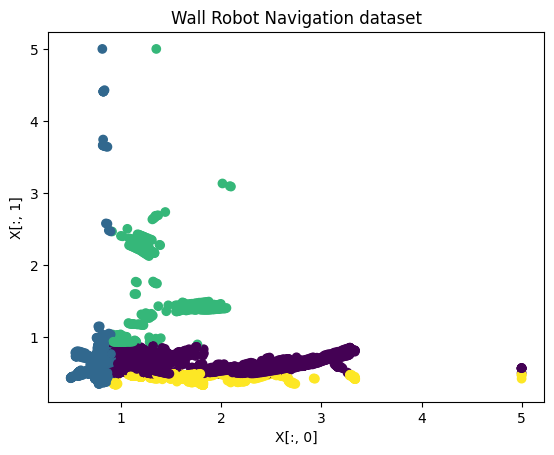

In [6]:

plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.title('Wall Robot Navigation dataset')
plt.xlabel('X[:, 0]')
plt.ylabel('X[:, 1]')
plt.savefig('Dataset')

## Seleção de modelos


### KNN

Primeiro, K-Tunning

In [7]:

best_mcc = 0

for i in range(20):
        
    knn = KNeighborsClassifier(n_neighbors= i +1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        train_size=0.7, 
                                                        shuffle=True,
                                                        random_state=32)


    cv = KFold(n_splits=10, shuffle=True, random_state=32)

    knn.fit(X_train, y_train)

    mcc = cross_val_score(knn, X_test, y_test, cv=cv, scoring=make_scorer(matthews_corrcoef))

    print(f'K = {i + 1} -> {round(sum(mcc) / len(mcc), 4)}')
    



K = 1 -> 0.9667
K = 2 -> 0.9573
K = 3 -> 0.963
K = 4 -> 0.9593
K = 5 -> 0.9602
K = 6 -> 0.9518
K = 7 -> 0.9518
K = 8 -> 0.949
K = 9 -> 0.9425
K = 10 -> 0.938
K = 11 -> 0.9307
K = 12 -> 0.9295
K = 13 -> 0.9259
K = 14 -> 0.9203
K = 15 -> 0.9204
K = 16 -> 0.9129
K = 17 -> 0.9184
K = 18 -> 0.9082
K = 19 -> 0.9044
K = 20 -> 0.8979


Utilizando `K = 4`

In [8]:
knn = KNeighborsClassifier(n_neighbors=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    shuffle=True,
                                                    random_state=32)


cv = KFold(n_splits=10, shuffle=True, random_state=32)

knn.fit(X_train, y_train)

mcc = cross_val_score(knn, X_test, y_test, cv=cv, scoring=make_scorer(matthews_corrcoef))
f1_micro = cross_val_score(knn, X_test, y_test, cv=cv, scoring=make_scorer(f1_score, average='micro'))
f1_macro = cross_val_score(knn, X_test, y_test, cv=cv, scoring=make_scorer(f1_score, average='macro'))

print('MCC: {}; F1-Micro = {}; F1-Macro {}'.format(
    round(max(mcc), 6), 
    round(max(f1_micro), 6), 
    round(max(f1_macro), 6),
    )
)


MCC: 1.0; F1-Micro = 1.0; F1-Macro 1.0


### Regressão Logística

In [9]:
logit = LogisticRegression(penalty='l2', multi_class='multinomial')

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    shuffle=True,
                                                    random_state=32)


cv = KFold(n_splits=10, shuffle=True, random_state=32)

logit.fit(X_train, y_train)

mcc = cross_val_score(logit, X_test, y_test, cv=cv, scoring=make_scorer(matthews_corrcoef))
f1_micro = cross_val_score(logit, X_test, y_test, cv=cv, scoring=make_scorer(f1_score, average='micro'))
f1_macro = cross_val_score(logit, X_test, y_test, cv=cv, scoring=make_scorer(f1_score, average='macro'))

print('MCC: {}; F1-Micro = {}; F1-Macro {}'.format(
    round(max(mcc), 6), 
    round(max(f1_micro), 6), 
    round(max(f1_macro), 6),
    )
)

MCC: 0.814948; F1-Micro = 0.877301; F1-Macro 0.849361



### Fronteira de decisão

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


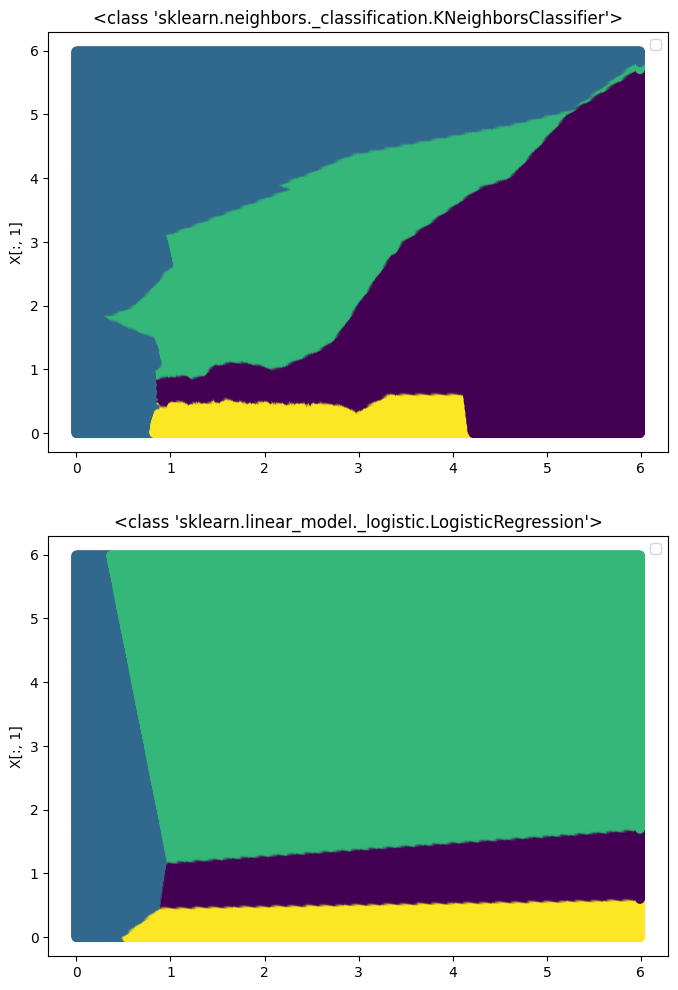

In [10]:
rng = np.arange(0, 6, 0.01)
X_ex = pd.DataFrame([(x, y) for x in rng for y in rng]).to_numpy()

modelos = [knn, logit]

fig, axs = plt.subplots(len(modelos), 1, figsize=(8, 12))

# Itera modelos

for i, modelo in enumerate(modelos):

    # Plota
    axs[i].scatter(x=X_ex[:, 0], y=X_ex[:, 1], c=modelo.predict(X_ex))
    axs[i].set_title(str(type(modelo)))
    axs[i].set_ylabel('X[:, 1]')
    axs[i].legend()


plt.style.use('tableau-colorblind10')
plt.show()
fig.savefig('Limites')




### Tempo de execução

In [11]:

def timeit(func):
    
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'Function {args} levou {total_time:.4f} segundos')
        return result
    return timeit_wrapper


@timeit
def calcular_tempo(modelo):
    modelo.predict(X_train)

for modelo in modelos:
    calcular_tempo(modelo)

Function (KNeighborsClassifier(n_neighbors=4),) levou 0.1095 segundos
Function (LogisticRegression(multi_class='multinomial'),) levou 0.0010 segundos
